In [1]:
# Importy
import pandas as pd
import numpy as np
import pm4py
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime

from pm4py import discover_bpmn_inductive
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

In [2]:
log = xes_importer.apply('logs/exercise6.xes')

C:\Users\sroka\AppData\Roaming\Python\Python39\site-packages\pm4py\util\dt_parsing\parser.py:76: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/132 [00:00<?, ?it/s]

In [3]:
df = log_converter.apply(log, variant=log_converter.Variants.TO_DATA_FRAME)

In [4]:
df.head()

,org:resource,time:timestamp,concept:name,lifecycle:transition,case:concept:name
0,Call Centre Agent,2005-12-31 23:00:00+00:00,check if sufficient information is available,start,0
1,Call Centre Agent,2006-01-13 23:00:00+00:00,check if sufficient information is available,complete,0
2,Call Centre Agent,2006-01-13 23:00:00+00:00,register claim,start,0
3,Call Centre Agent,2008-01-29 23:00:00+00:00,register claim,complete,0
4,Claims handler,2008-01-29 23:00:00+00:00,determine likelihood of claim,start,0


In [5]:
print(df.groupby(['lifecycle:transition'])['lifecycle:transition'].count())

lifecycle:transition
complete    821
start       821
Name: lifecycle:transition, dtype: int64


In [6]:
df['start_timestamp'] = df.loc[df['lifecycle:transition'] == 'start', 'time:timestamp']
df['complete_timestamp'] = df.loc[df['lifecycle:transition'] == 'complete', 'time:timestamp']
df.drop(['lifecycle:transition', 'time:timestamp'], axis=1, inplace=True)

In [7]:
df.head(5)

,org:resource,concept:name,case:concept:name,start_timestamp,complete_timestamp
0,Call Centre Agent,check if sufficient information is available,0,2005-12-31 23:00:00+00:00,NaT
1,Call Centre Agent,check if sufficient information is available,0,NaT,2006-01-13 23:00:00+00:00
2,Call Centre Agent,register claim,0,2006-01-13 23:00:00+00:00,NaT
3,Call Centre Agent,register claim,0,NaT,2008-01-29 23:00:00+00:00
4,Claims handler,determine likelihood of claim,0,2008-01-29 23:00:00+00:00,NaT


In [8]:
# Grupowanie po pierwszych trzech kolumnach
grouped = df.groupby(['org:resource', 'concept:name', 'case:concept:name'], as_index=False)

# Agregowanie wartości start_timestamp i complete_timestamp za pomocą funkcji first i last
df = grouped.agg({'start_timestamp': 'first', 'complete_timestamp': 'last'})

In [9]:
df.head()

,org:resource,concept:name,case:concept:name,start_timestamp,complete_timestamp
0,Call Centre Agent,check if sufficient information is available,0,2005-12-31 23:00:00+00:00,2006-01-13 23:00:00+00:00
1,Call Centre Agent,check if sufficient information is available,1,2005-12-31 23:00:00+00:00,2006-03-07 23:00:00+00:00
2,Call Centre Agent,check if sufficient information is available,10,2006-03-30 23:00:00+00:00,2006-04-09 23:00:00+00:00
3,Call Centre Agent,check if sufficient information is available,100,2008-07-26 23:00:00+00:00,2008-09-16 23:00:00+00:00
4,Call Centre Agent,check if sufficient information is available,101,2007-11-13 23:00:00+00:00,2008-01-19 23:00:00+00:00


In [10]:
call_centre_agent = df.loc[df['org:resource'] == 'Call Centre Agent']
print(call_centre_agent['concept:name'].unique())

['check if sufficient information is available' 'end' 'register claim']


In [11]:
check_if_sufficient = call_centre_agent.loc[call_centre_agent['concept:name'] == 'check if sufficient information is available']
register_claim = call_centre_agent.loc[call_centre_agent['concept:name'] == 'register claim']
end = call_centre_agent.loc[call_centre_agent['concept:name'] == 'end']

In [12]:
def plot_log_times(df):
    fig, ax = plt.subplots(figsize=(14,6))
    ax.plot(df[['start_timestamp', 'complete_timestamp']], df['case:concept:name'], alpha=0.5, label=['Start_date', 'End_date'])

    plt.legend()
    plt.show()

def plot_only_lines(df: pd.DataFrame, xlim, plot_color: str = 'r'):
    for i in range(df.shape[0] - 1):
        ax.plot([np.array(df['start_timestamp'])[i], np.array(df['complete_timestamp'])[i]], [np.array(df['case:concept:name'])[i],np.array(df['case:concept:name'])[i]], color=plot_color,alpha=0.7,)
    ax.get_yaxis().set_visible(False)
    ax.set(xlim=xlim)

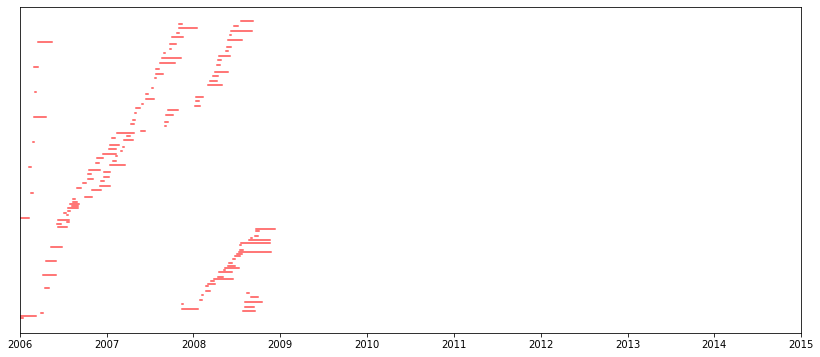

In [13]:
xlim_lower = datetime.strptime('2006-01-01', '%Y-%m-%d')
xlim_upper = datetime.strptime('2015-01-01', '%Y-%m-%d')

fig, ax = plt.subplots(figsize=[14,6])
plot_only_lines(check_if_sufficient, xlim=(xlim_lower, xlim_upper))

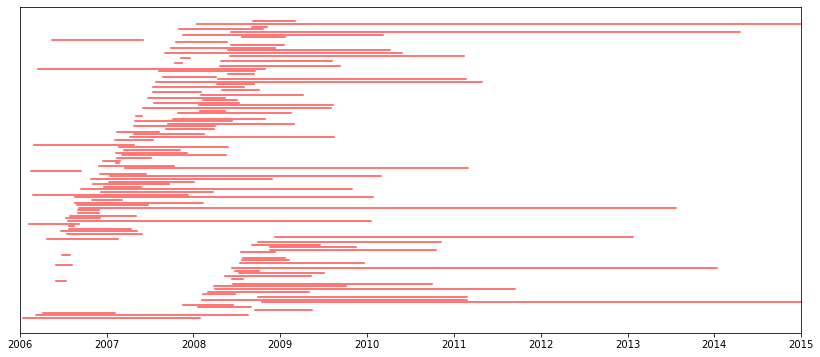

In [14]:
fig, ax = plt.subplots(figsize=[14,6])
plot_only_lines(register_claim, xlim=(xlim_lower, xlim_upper))

In [15]:
claims_handler = df.loc[df['org:resource'] == 'Claims handler']
print(claims_handler['concept:name'].unique())

['advise claimant on reimbursement' 'assess claim' 'close claim'
 'determine likelihood of claim' 'end' 'initiate payment']


In [16]:
assess_claim = claims_handler.loc[claims_handler['concept:name'] == 'assess claim']
close_claim = claims_handler.loc[claims_handler['concept:name'] == 'close claim']
determine_likelihood = claims_handler.loc[claims_handler['concept:name'] == 'determine likelihood of claim']

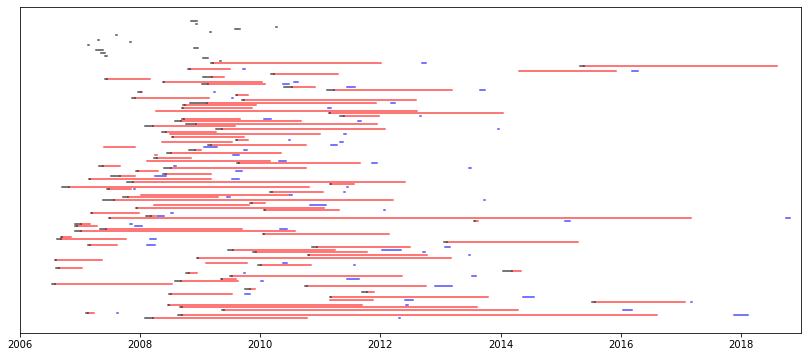

In [17]:
xlim_lower = datetime.strptime('2006-01-01', '%Y-%m-%d')
xlim_upper = datetime.strptime('2019-01-01', '%Y-%m-%d')

fig, ax = plt.subplots(figsize=[14,6])
plot_only_lines(assess_claim, xlim=(xlim_lower, xlim_upper), plot_color='red')
plot_only_lines(close_claim, xlim=(xlim_lower, xlim_upper), plot_color='blue')
plot_only_lines(determine_likelihood, xlim=(xlim_lower, xlim_upper), plot_color='black')